<a href="https://colab.research.google.com/github/longovinicius/Coursera_Capstone/blob/master/Sampa_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# São Paulo Analysis

 **Imagine we are willing to open a unit of a fast-food burger chain in São Paulo city, but we are still deciding where it should be placed**

![Picture of São Paulo](https://www.dwih-saopaulo.org/files/2019/03/iStock-483342613_1600x907.jpg)

(Every part of the code is explained by Markdown text)

### Data acquisition and cleaning

Importing dependencies and extracting data set about the "Subprefectures" (Boroughs) of Sao Paulo and their HDI(Human Development Index). In the wikipedia page, there here were 3 different tables diving the boroughs, so we have to concatenate them.

In [3]:
import pandas as pd
import numpy as np

# Extracting data frames from the wikipedia page called 'List of subprefectures of Sao Paulo City by HDI'
df = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_subprefeituras_de_S%C3%A3o_Paulo_por_%C3%8Dndice_de_Desenvolvimento_Humano')

# The wikipedia page was divided into 3 different data frames, organized by the HDI levels ('very high HDI', 'high HDI', 'avg HDI')
# Let's concatenate those data frames
frames = [df[2], df[6], df[10]]
df = pd.concat(frames)

df.head()

Posição Subprefeitura           IDH              
  Posição Subprefeitura Dados de 2010 Dados de 2000
0       1     Pinheiros           942           910
1       2  Vila Mariana           938           897
2       3   Santo Amaro           909           867
3       4          Lapa           906           849
4       5            Sé           889           831

Setting the column names to english and dropping the ones we won't use

In [4]:
# Changing column names
df.columns = ['Position', 'Borough', 'HDI', '2000']

# Reorganizing columns (using only the most recent data, from 2010)
df.drop('2000', axis=1, inplace=True)
df.set_index('Position', inplace=True)
df.index.name = None

df.head()

,Borough,HDI
1,Pinheiros,942
2,Vila Mariana,938
3,Santo Amaro,909
4,Lapa,906
5,Sé,889


Distribution of Boroughs by HDI

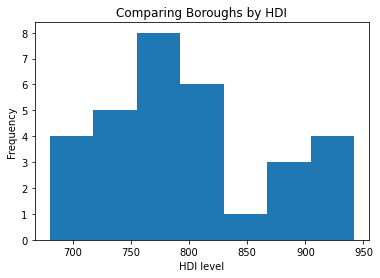

In [27]:
 import matplotlib.pyplot as plt

df['HDI'].plot(kind='hist', bins=7)

plt.title('Comparing Boroughs by HDI')
plt.ylabel('Frequency')
plt.xlabel('HDI level') 

plt.show()


Now we'll include the second data set, from the Sao Paulo's town hall website.  

In [ ]:
df2 = pd.read_html('/content/sample_data/sp_table_html')[0]
df2.head()

,Subprefeituras,Distritos,Ãrea (kmÂ²),PopulaÃ§Ã£o (2010),Densidade DemogrÃ¡fica (Hab/kmÂ²)
0,Aricanduva,Aricanduva,660.0,89.622,13.579
1,Aricanduva,CarrÃ£o,750.0,83.281,11.104
2,Aricanduva,Vila Formosa,740.0,94.799,12.811
3,Aricanduva,TOTAL,2150.0,267.702,12.451
4,ButantÃ£,ButantÃ£,1250.0,54.196,4.336


As we can see, some column names are desconfigurated and in Portuguese, so we need to arrange those. Then, we'll extract the Population and Demographic Density(citizens per km2) of the 31 Boroughs.

In [ ]:
# handling some exeptions
jabaquara = df2.iloc[[47]]
ctiradentes = df2.iloc[[25]]

demo = df2[df2['Distritos']=='TOTAL']

demo = demo.append(jabaquara)
demo = demo.append(ctiradentes)

demo.drop(columns=['Distritos','Ãrea (kmÂ²)'], inplace=True)
demo.rename(columns={'Subprefeituras': 'Borough', 'PopulaÃ§Ã£o (2010)': 'Population', 'Densidade DemogrÃ¡fica (Hab/kmÂ²)': 'Demographic Density'}, inplace=True)
demo.head()


,Borough,Population,Demographic Density
3,Aricanduva,267.702,12.451
9,ButantÃ£,428.217,7.633
13,Campo Limpo,607.105,16.542
17,Capela do Socorro,594.930,4.433
21,Casa Verde,309.376,11.587


Now we want to merge both data frames using the borough names. But we can only do that if they are written exactly the same way. Le's compare them first.

In [ ]:
print(sorted(df.Borough.values))
print(sorted(demo.Borough.values))


['Aricanduva/Formosa/Carrão', 'Butantã', 'Campo Limpo', 'Capela do Socorro', 'Casa Verde/Cachoeirinha', 'Cidade Ademar', 'Cidade Tiradentes', 'Ermelino Matarazzo', 'Freguesia do Ó/Brasilândia', 'Guaianases', 'Ipiranga', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'Jaçanã/Tremembé', 'Lapa', "M'Boi Mirim", 'Mooca', 'Parelheiros', 'Penha', 'Perus', 'Pinheiros', 'Pirituba/Jaraguá', 'Santana/Tucuruvi', 'Santo Amaro', 'São Mateus', 'São Miguel Paulista', 'Sé', 'Vila Maria/Vila Guilherme', 'Vila Mariana', 'Vila Prudente']
['Aricanduva', 'ButantÃ£', 'Campo Limpo', 'Capela do Socorro', 'Casa Verde', 'Cidade Ademar', 'Cidade Tiradentes', 'Ermelino Matarazzo', 'Freguesia do Ã\x93', 'Guaianases', 'Ipiranga', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'JaÃ§anÃ£', 'Lapa', "M'Boi Mirim", 'Mooca', 'Parelheiros', 'Penha', 'Perus', 'Pinheiros', 'Pirituba', 'Santana', 'Santo Amaro', 'SÃ£o Mateus', 'SÃ£o Miguel', 'SÃ©', 'Vila Maria/Vila Guilherme', 'Vila Mariana', 'Vila Prudente']


Now we know what borough names we need to change, let's do that and test it.

In [ ]:
demo.Borough.replace({'Aricanduva': 'Aricanduva/Formosa/Carrão',
                      'ButantÃ£': 'Butantã',
                      'Casa Verde': 'Casa Verde/Cachoeirinha',
                      'Freguesia do Ã\x93': 'Freguesia do Ó/Brasilândia',
                      'JaÃ§anÃ£': 'Jaçanã/Tremembé',
                      'Pirituba': 'Pirituba/Jaraguá',
                      'Santana': 'Santana/Tucuruvi',
                      'SÃ£o Mateus': 'São Mateus',
                      'SÃ£o Miguel': 'São Miguel Paulista',
                      'SÃ©': 'Sé',
                      'Capela do Socorro': 'Socorro'}, inplace=True)

df.Borough.replace({'Capela do Socorro': 'Socorro'}, inplace=True)
print(sorted(df.Borough.values))
print(sorted(demo.Borough.values))

['Aricanduva/Formosa/Carrão', 'Butantã', 'Campo Limpo', 'Casa Verde/Cachoeirinha', 'Cidade Ademar', 'Cidade Tiradentes', 'Ermelino Matarazzo', 'Freguesia do Ó/Brasilândia', 'Guaianases', 'Ipiranga', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'Jaçanã/Tremembé', 'Lapa', "M'Boi Mirim", 'Mooca', 'Parelheiros', 'Penha', 'Perus', 'Pinheiros', 'Pirituba/Jaraguá', 'Santana/Tucuruvi', 'Santo Amaro', 'Socorro', 'São Mateus', 'São Miguel Paulista', 'Sé', 'Vila Maria/Vila Guilherme', 'Vila Mariana', 'Vila Prudente']
['Aricanduva/Formosa/Carrão', 'Butantã', 'Campo Limpo', 'Casa Verde/Cachoeirinha', 'Cidade Ademar', 'Cidade Tiradentes', 'Ermelino Matarazzo', 'Freguesia do Ó/Brasilândia', 'Guaianases', 'Ipiranga', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'Jaçanã/Tremembé', 'Lapa', "M'Boi Mirim", 'Mooca', 'Parelheiros', 'Penha', 'Perus', 'Pinheiros', 'Pirituba/Jaraguá', 'Santana/Tucuruvi', 'Santo Amaro', 'Socorro', 'São Mateus', 'São Miguel Paulista', 'Sé', 'Vila Maria/Vila Guilherme', 'Vila Mariana

We can see that the value types of the Population and demographic Density columns are strings and separated with unnecessary points that will confuse our program. Let's arrage those numbers.

In [ ]:
for pop, dem in zip(demo['Population'], demo['Demographic Density']):
  
  demo['Population'].replace({pop: int(pop*1000)}, inplace=True)
  if float(dem)<100:
    demo['Demographic Density'].replace({dem: round(dem, 3)*1000}, inplace=True)
  else:
    demo['Demographic Density'].replace({dem: float(dem)}, inplace=True)

demo['Demographic Density'] = demo['Demographic Density'].astype(int)
demo['Population'] = demo['Population'].astype(int)

demo.reset_index(inplace=True)
demo.drop(columns=['index'], inplace=True)

demo.head()

,Borough,Population,Demographic Density
0,Aricanduva/Formosa/Carrão,267702,12451
1,Butantã,428217,7633
2,Campo Limpo,607105,16542
3,Socorro,594930,4433
4,Casa Verde/Cachoeirinha,309376,11587


Finally we can merge both tables

In [ ]:
df_sp = pd.merge(df, demo, on='Borough')
df_sp

,Borough,HDI,Population,Demographic Density
0,Pinheiros,942,289743,9140
1,Vila Mariana,938,344631,13005
2,Santo Amaro,909,238025,6347
3,Lapa,906,305526,7619
4,Sé,889,431106,16454
5,Mooca,869,343980,9772
6,Santana/Tucuruvi,869,324815,9361
7,Butantã,859,428217,7633
8,Ipiranga,824,463804,12368
9,Aricanduva/Formosa/Carrão,822,267702,12451


Now the table looks a lot nicer. We'll need the coordinate of those boroughs. We will use the 'Nominatim' funcion from geopy

In [ ]:
#!pip install geocoder
from geopy.geocoders import Nominatim

longitude_list = []
latitude_list = []
g = Nominatim(user_agent='sp_explorer')
for region in df_sp['Borough']:
  # checking if we can find all the coordinat
  try:
    location = g.geocode('{}, São Paulo, SP'.format(region.split('/')[0]))
    longitude_list.append(location.longitude)
    latitude_list.append(location.latitude)
    print('Alright with {}'.format(region))
  except:
    print('{} was not found!'.format(region))



Alright with Pinheiros
Alright with Vila Mariana
Alright with Santo Amaro
Alright with Lapa
Alright with Sé
Alright with Mooca
Alright with Santana/Tucuruvi
Alright with Butantã
Alright with Ipiranga
Alright with Aricanduva/Formosa/Carrão
Alright with Jabaquara
Alright with Penha
Alright with Casa Verde/Cachoeirinha
Alright with Vila Maria/Vila Guilherme
Alright with Pirituba/Jaraguá
Alright with Vila Prudente
Alright with Campo Limpo
Alright with Ermelino Matarazzo
Alright with Jaçanã/Tremembé
Alright with Freguesia do Ó/Brasilândia
Alright with Itaquera
Alright with Cidade Ademar
Alright with Socorro
Alright with São Miguel Paulista
Alright with São Mateus
Alright with Perus
Alright with Itaim Paulista
Alright with M'Boi Mirim
Alright with Guaianases
Alright with Cidade Tiradentes
Alright with Parelheiros


Every coordinate was founded, let's merge them into one data frame

In [ ]:
# Creating latitude and longitude columns
df_sp['Latitude'] = latitude_list
df_sp['Longitude'] = longitude_list

df_sp.head()

,Borough,HDI,Population,Demographic Density,Latitude,Longitude
0,Pinheiros,942,289743,9140,-23.567249,-46.701951
1,Vila Mariana,938,344631,13005,-23.583700,-46.632741
2,Santo Amaro,909,238025,6347,-23.656230,-46.719116
3,Lapa,906,305526,7619,-23.521576,-46.704349
4,Sé,889,431106,16454,-23.550443,-46.633446


Now that we have those coordinates, we can plot a map with the boroughs of São Paulo

### Exploratory Data Analysis

In [ ]:
import folium

SP_loc = g.geocode('São Paulo, SP')

map_SP = folium.Map(location=[SP_loc.latitude, SP_loc.longitude], zoom_start=11)

for lat, lng, label in zip(df_sp['Latitude'], df_sp['Longitude'], df_sp['Borough']):
  folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_SP)
map_SP

As said in the introduction, we would like to place our restaurant in a dense area and with upper middle class citizens, let's use Boroughs with HDI above 800 and density of above 5000 citizens/km2

In [ ]:
df_sp = df_sp[df_sp['HDI']>800]
df_sp = df_sp[df_sp['Demographic Density']>5000]
df_sp

,Borough,HDI,Population,Demographic Density,Latitude,Longitude
0,Pinheiros,942,289743,9140,-23.567249,-46.701951
1,Vila Mariana,938,344631,13005,-23.583700,-46.632741
2,Santo Amaro,909,238025,6347,-23.656230,-46.719116
3,Lapa,906,305526,7619,-23.521576,-46.704349
4,Sé,889,431106,16454,-23.550443,-46.633446
5,Mooca,869,343980,9772,-23.560681,-46.597192
6,Santana/Tucuruvi,869,324815,9361,-23.499321,-46.628933
7,Butantã,859,428217,7633,-23.569131,-46.721874
8,Ipiranga,824,463804,12368,-23.589273,-46.606162
9,Aricanduva/Formosa/Carrão,822,267702,12451,-23.578024,-46.511454


As we can see, there are only 12 Boroughs out of 31. Now we need to find what Neighborhoods are within those Boroughs. 
First, we need to fix some names of the original data frame (second). 

In [ ]:
df2.Subprefeituras.replace({'Aricanduva': 'Aricanduva/Formosa/Carrão',
                      'ButantÃ£': 'Butantã',
                      'Casa Verde': 'Casa Verde/Cachoeirinha',
                      'Freguesia do Ã\x93': 'Freguesia do Ó/Brasilândia',
                      'JaÃ§anÃ£': 'Jaçanã/Tremembé',
                      'Pirituba': 'Pirituba/Jaraguá',
                      'Santana': 'Santana/Tucuruvi',
                      'SÃ£o Mateus': 'São Mateus',
                      'SÃ£o Miguel': 'São Miguel Paulista',
                      'SÃ©': 'Sé',
                      'Capela do Socorro': 'Socorro'}, inplace=True)

In [ ]:
df2 = df2[df2['Distritos']!= 'TOTAL']

Now we will assign each neighborhood with its borough, but only using the 12 borougs that we find that fit best for our restaurant.

In [ ]:
borough_neigh = {}
for borough, neigh in zip(df2['Subprefeituras'], df2['Distritos']):
  if borough in df_sp.Borough.values:
    borough_neigh[neigh] = [borough]

neighborhoods = []
boroughs = []


Let's create a new data frame with all the neighborhoods that we are going to study

In [ ]:
df_neigh = pd.DataFrame(borough_neigh).transpose()
df_neigh

,0
Aricanduva,Aricanduva/Formosa/Carrão
CarrÃ£o,Aricanduva/Formosa/Carrão
Vila Formosa,Aricanduva/Formosa/Carrão
ButantÃ£,Butantã
Morumbi,Butantã
Raposo Tavares,Butantã
Rio Pequeno,Butantã
Vila SÃ´nia,Butantã
Cursino,Ipiranga
Ipiranga,Ipiranga


Let's check if we can find the coordinates of each neighborhood with geopy. Then we'll assign the latitude and longitude values so we can merge them into the new data frame

In [ ]:
latitude = []
longitude = []
for neighborhood in df_neigh.index:
  # checking if we can find all the coordinat
  try:
    location = g.geocode('{}, São Paulo, SP'.format(neighborhood.split('/')[0]))
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    print('Alright with {}'.format(neighborhood))
  except:
    print('{} was not found!'.format(neighborhood))

Alright with Aricanduva
CarrÃ£o was not found!
Alright with Vila Formosa
ButantÃ£ was not found!
Alright with Morumbi
Alright with Raposo Tavares
Alright with Rio Pequeno
Vila SÃ´nia was not found!
Alright with Cursino
Alright with Ipiranga
SacomÃ£ was not found!
Alright with Jabaquara
Alright with Barra Funda
Alright with Jaguara
JaguarÃ© was not found!
Alright with Lapa
Alright with Perdizes
Alright with Vila Leopoldina
Alright with Ãgua Rasa
BelÃ©m was not found!
Alright with BrÃ¡s
Alright with Mooca
Alright with Pari
TatuapÃ© was not found!
Alright with Artur Alvim
CangaÃ­ba was not found!
Alright with Penha
Alright with Vila Matilde
Alright with Alto de Pinheiros
Alright with Itaim Bibi
Alright with Jardim Paulista
Alright with Pinheiros
Alright with Mandaqui
Alright with Santana
Alright with Tucuruvi
Alright with Campo Belo
Alright with Campo Grande
Alright with Santo Amaro
Alright with Bela Vista
Alright with Bom Retiro
Alright with Cambuci
ConsolaÃ§Ã£o was not found!
Alright w

As we can clearly see, not every neighborhood was founded, because the names are weirdly configurated, let's solve those neighborhoods that we couldnt find and do the searches again

In [ ]:
df_neigh.rename(index={'CarrÃ£o':'Carrão',
                       'ButantÃ£':'Butantã',
                       'SacomÃ£':'Sacomã',
                       'JaguarÃ©':'Jaguaré',
                       'BelÃ©m':'Belém',
                       'TatuapÃ©':'Tatuapé',
                       'CangaÃ­ba':'Cangaíba',
                       'ConsolaÃ§Ã£o':'Consolação',
                       'RepÃºblica':'República',
                       'Santa CecÃ­lia':'Santa Cecília',
                       'SaÃºde':'Saúde',
                       'Vila SÃ´nia': 'Vila Sônia'}, inplace=True)

latitude = []
longitude = []
for neighborhood in df_neigh.index:
  # checking if we can find all the coordinat
  try:
    location = g.geocode('{}, São Paulo, SP'.format(neighborhood.split('/')[0]))
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    print('Alright with {}'.format(neighborhood))
  except:
    print('{} was not found!'.format(neighborhood))

Alright with Aricanduva
Alright with Carrão
Alright with Vila Formosa
Alright with Butantã
Alright with Morumbi
Alright with Raposo Tavares
Alright with Rio Pequeno
Alright with Vila Sônia
Alright with Cursino
Alright with Ipiranga
Alright with Sacomã
Alright with Jabaquara
Alright with Barra Funda
Alright with Jaguara
Alright with Jaguaré
Alright with Lapa
Alright with Perdizes
Alright with Vila Leopoldina
Alright with Ãgua Rasa
Alright with Belém
Alright with BrÃ¡s
Alright with Mooca
Alright with Pari
Alright with Tatuapé
Alright with Artur Alvim
Alright with Cangaíba
Alright with Penha
Alright with Vila Matilde
Alright with Alto de Pinheiros
Alright with Itaim Bibi
Alright with Jardim Paulista
Alright with Pinheiros
Alright with Mandaqui
Alright with Santana
Alright with Tucuruvi
Alright with Campo Belo
Alright with Campo Grande
Alright with Santo Amaro
Alright with Bela Vista
Alright with Bom Retiro
Alright with Cambuci
Alright with Consolação
Alright with Liberdade
Alright with R

In [ ]:
df_neigh.columns

RangeIndex(start=0, stop=1, step=1)

Let's change the column names and merge the coordinate columns into the new data frame

In [ ]:
df_neigh.columns = ['Borough']

df_neigh['Latitude'] = latitude
df_neigh['Longitude'] = longitude

df_neigh.head()


,Borough,Latitude,Longitude
Aricanduva,Aricanduva/Formosa/Carrão,-23.578024,-46.511454
Carrão,Aricanduva/Formosa/Carrão,-23.551530,-46.537791
Vila Formosa,Aricanduva/Formosa/Carrão,-23.566876,-46.546323
Butantã,Butantã,-23.569131,-46.721874
Morumbi,Butantã,-23.596499,-46.717845


Now let's plot the neighborhoods into the map

In [ ]:
SP_loc = g.geocode('São Paulo, SP')

map_SP = folium.Map(location=[SP_loc.latitude, SP_loc.longitude], zoom_start=12)

for lat, lng, label in zip(df_neigh['Latitude'], df_neigh['Longitude'], df_neigh.index):
  folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_SP)
map_SP

As we can see, there are still a ton of neighborhoods to analyse, let's use the Foursquare API to help us.

### Using Foursquare API

In [ ]:
CLIENT_ID = 'GBMTPAR54DCXHYMW50ITYODYKCJJ3S1OWZGPQ1XFYIECBCZB' # Foursquare ID
CLIENT_SECRET = 'EX1G52B34NG2RH0JOKW3ONLRNYQWER0VDJDRG5LCADQQK4HX' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

We only have the coordinates of the center of each Neighborhood, so we need to analise the area around them. This function will access Foursquare API and return a data frame with a list of at least 100 venues(and its information) located on each neighborhood.   

In [ ]:
import json
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Saving the information extracted from Foursquare API into the variable 'SP_venues'

In [ ]:
sp_venues = getNearbyVenues(names=df_neigh.index,
                                   latitudes=df_neigh['Latitude'],
                                   longitudes=df_neigh['Longitude']
                                  )

Aricanduva
Carrão
Vila Formosa
Butantã
Morumbi
Raposo Tavares
Rio Pequeno
Vila Sônia
Cursino
Ipiranga
Sacomã
Jabaquara
Barra Funda
Jaguara
Jaguaré
Lapa
Perdizes
Vila Leopoldina
Ãgua Rasa
Belém
BrÃ¡s
Mooca
Pari
Tatuapé
Artur Alvim
Cangaíba
Penha
Vila Matilde
Alto de Pinheiros
Itaim Bibi
Jardim Paulista
Pinheiros
Mandaqui
Santana
Tucuruvi
Campo Belo
Campo Grande
Santo Amaro
Bela Vista
Bom Retiro
Cambuci
Consolação
Liberdade
República
Santa Cecília
SÃ©
Moema
Saúde
Vila Mariana


In [ ]:
sp_venues.shape

(1973, 7)

In [ ]:
sp_grouped

,Neighborhood,Acai House,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Borek Place,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,...,Snack Place,Soccer Field,Soccer Stadium,Southeastern Brazilian Restaurant,Southern Brazilian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tapiocaria,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Artur Alvim,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Barra Funda,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.024390,0.000000,0.024390,0.097561,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.02439,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.024390,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bela Vista,0.000000,0.000000,0.000000,0.000000,0.02,0.00000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.00000,0.010000,0.00000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.010000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.00000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
3,Belém,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bom Retiro,0.000000,0.015152,0.000000,0.000000,0.00,0.00000,0.000000

In [ ]:
group = sp_venues.groupby('Neighborhood').count()
group = group[group['Venue']>15]
neighs = group.index

sp_venues = sp_venues[sp_venues['Neighborhood'].isin(neighs)]
sp_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
7,Carrão,-23.55153,-46.537791,Bar Sashimi Churrasquinho,-23.549690,-46.537620,Steakhouse
8,Carrão,-23.55153,-46.537791,Nikuya Espetos & Korean Food,-23.550292,-46.536348,Restaurant
9,Carrão,-23.55153,-46.537791,Mercadinho Popular,-23.549185,-46.538772,Convenience Store
10,Carrão,-23.55153,-46.537791,Doceria Ki Delicia,-23.550687,-46.534451,Dessert Shop
11,Carrão,-23.55153,-46.537791,Urizun Produtos Orientais,-23.549057,-46.535844,Grocery Store
...,...,...,...,...,...,...,...
1968,Vila Mariana,-23.58370,-46.632741,Lanchonete Sta. Cruz,-23.587637,-46.633590,Snack Place
1969,Vila Mariana,-23.58370,-46.632741,Flame Burger,-23.587789,-46.633991,Burger Joint
1970,Vila Mariana,-23.58370,-46.632741,Pizzaria Tradição,-23.586962,-46.631495,Pizza Place
1971,Vila Mariana,-23.58370,-46.632741,Padaria Boca do Forno,-23.583319,-46.631631,Bakery


Let's see how many unique categories of venues there are 

In [ ]:
len(sp_venues['Venue Category'].unique())

256

In [ ]:
# one hot encoding
sp_onehot = pd.get_dummies(sp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sp_onehot['Neighborhood'] = sp_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sp_onehot.columns[-1]] + list(sp_onehot.columns[:-1])
sp_onehot = sp_onehot[fixed_columns]

sp_onehot.head()

,Neighborhood,Acai House,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Borek Place,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,...,Snack Place,Soccer Field,Soccer Stadium,Southeastern Brazilian Restaurant,Southern Brazilian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tapiocaria,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
7,Carrão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Carrão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Carrão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Carrão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Carrão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sp_onehot.shape

(1859, 257)

Let's group rows by neighborhood and by taking the mean of the frequency of occurence of each category, then, let's create a function to sort the venues in descending order 

In [ ]:
sp_grouped = sp_onehot.groupby('Neighborhood').mean().reset_index()


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sp_grouped['Neighborhood']

for ind in np.arange(sp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Artur Alvim,Pizza Place,Department Store,Cosmetics Shop,Pastelaria,Newsstand,Grocery Store,Chocolate Shop,Beer Garden,Gym / Fitness Center,Bar
1,Barra Funda,Brazilian Restaurant,Music Venue,Restaurant,Café,Sandwich Place,Indoor Play Area,Cultural Center,Sporting Goods Shop,Boutique,Bus Station
2,Bela Vista,Italian Restaurant,Pizza Place,Nightclub,Bar,Restaurant,Hotel,Brazilian Restaurant,Café,Cosmetics Shop,Hostel
3,Belém,Ice Cream Shop,Diner,Restaurant,Soccer Field,Cycle Studio,Tennis Court,Gym Pool,Gym / Fitness Center,Martial Arts Dojo,General Entertainment
4,Bom Retiro,Korean Restaurant,Brazilian Restaurant,Café,Dessert Shop,Women's Store,Bar,Grocery Store,Bakery,Coffee Shop,Hot Dog Joint


### Clustering and Statistical Inference

Using Kmeans algorithm with K=5

In [ ]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

sp_grouped_clustering = sp_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 1, 0, 0, 2, 1, 1, 1], dtype=int32)

In [ ]:
neighborhoods_venues_sorted.sort_values('Cluster Labels')

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,0,Vila Leopoldina,Brazilian Restaurant,Italian Restaurant,Gym,BBQ Joint,Snack Place,Stadium,Market,Supermarket,Music Venue,Restaurant
22,0,Pinheiros,Brazilian Restaurant,Restaurant,Nightclub,Burger Joint,Japanese Restaurant,Coffee Shop,Café,Food Truck,Breakfast Spot,Buffet
23,0,República,Brazilian Restaurant,Bar,Coffee Shop,Record Shop,Theater,Dessert Shop,Tea Room,Café,Ice Cream Shop,Pizza Place
13,0,Jardim Paulista,Hotel,Gym / Fitness Center,Restaurant,Italian Restaurant,Spanish Restaurant,Coffee Shop,Bakery,Spa,Tapas Restaurant,Ice Cream Shop
12,0,Itaim Bibi,Italian Restaurant,Japanese Restaurant,Restaurant,Brazilian Restaurant,Burger Joint,Bar,French Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop
10,0,Consolação,Brazilian Restaurant,Coffee Shop,Gym / Fitness Center,Café,Movie Theater,Vegetarian / Vegan Restaurant,Hotel,Ice Cream Shop,Italian Restaurant,Indie Movie Theater
27,0,Santo Amaro,Restaurant,Metro Station,Japanese Restaurant,Perfume Shop,Bistro,Tea Room,Brazilian Restaurant,Bakery,Pool,Outdoors & Recreation
25,0,Santa Cecília,Brazilian Restaurant,Restaurant,Japanese Restaurant,Bistro,Salon / Barbershop,Bakery,Theater,Art Gallery,Pizza Place,Pub
5,0,BrÃ¡s,Brazilian Restaurant,Clothing Store,Park,Buffet,Furniture / Home Store,Gaming Cafe,Shoe Store,Café,Sandwich Place,Chocolate Shop
4,0,Bom Retiro,Korean Restaurant,Brazilian Restaurant,Café,Dessert Shop,Women's Store,Bar,Grocery Store,Bakery,Coffee Shop,Hot Dog Joint


After analysing the results of the clustering process, we realized that neighborhoods labeled as "cluster 1" matched the best with our needs.

Selecting the Neighborhoods assigned with Cluster Label = 1

In [ ]:
neighs = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==1]['Neighborhood']
df_neighborhoods = df_neigh[df_neigh.index.isin(neighs)]
df_neighborhoods

,Borough,Latitude,Longitude
Carrão,Aricanduva/Formosa/Carrão,-23.551530,-46.537791
Morumbi,Butantã,-23.596499,-46.717845
Ipiranga,Ipiranga,-23.589273,-46.606162
Lapa,Lapa,-23.521576,-46.704349
Perdizes,Lapa,-23.537929,-46.680671
Belém,Mooca,-23.534883,-46.594939
Mooca,Mooca,-23.560681,-46.597192
Penha,Penha,-23.523683,-46.543782
Vila Matilde,Penha,-23.536179,-46.524605
Santana,Santana/Tucuruvi,-23.499321,-46.628933


Creating a Map with only the chosen Neighborhoods

In [ ]:
map_SP = folium.Map(location=[SP_loc.latitude, SP_loc.longitude], zoom_start=11)

for lat, lng, label in zip(df_neighborhoods['Latitude'], df_neighborhoods['Longitude'], df_neighborhoods.index):
  folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_SP)
map_SP

Comparing the Final Neighborhoods by incident of possible competitors

In [ ]:

neighs = df_neighborhoods.index

bairros = sp_grouped[sp_grouped['Neighborhood'].isin(neighs)]
final_neighborhoods = bairros.loc[:,['Neighborhood', 'Burger Joint', 'Sandwich Place', 'BBQ Joint', 'Bar']]

final_neighborhoods.reset_index(drop=True)


,Neighborhood,Burger Joint,Sandwich Place,BBQ Joint,Bar
0,Belém,0.000000,0.000000,0.040000,0.000000
1,Campo Belo,0.022222,0.000000,0.000000,0.111111
2,Campo Grande,0.000000,0.000000,0.000000,0.000000
3,Carrão,0.000000,0.000000,0.088235,0.029412
4,Ipiranga,0.065217,0.021739,0.000000,0.043478
5,Lapa,0.000000,0.000000,0.000000,0.051282
6,Liberdade,0.000000,0.028571,0.028571,0.042857
7,Moema,0.027778,0.000000,0.013889,0.000000
8,Mooca,0.092593,0.000000,0.018519,0.222222
9,Morumbi,0.000000,0.025641,0.000000,0.000000


Creating a Formula to Determine the Final Results

In [ ]:
results = []

for index, row in final_neighborhoods.iterrows():
  results.append(round(-(row['Burger Joint']*3+row['Sandwich Place']+row['BBQ Joint']-row['Bar']*2)*100, 3))

final_neighborhoods['Results'] = results

In [ ]:
final_neighborhoods.sort_values(by=['Results'], ascending=False)

,Neighborhood,Burger Joint,Sandwich Place,BBQ Joint,Bar,Results
7,Campo Belo,0.022222,0.000000,0.000000,0.111111,15.556
17,Mooca,0.092593,0.000000,0.018519,0.222222,14.815
14,Lapa,0.000000,0.000000,0.000000,0.051282,10.256
28,Saúde,0.000000,0.047619,0.000000,0.047619,4.762
15,Liberdade,0.000000,0.028571,0.028571,0.042857,2.857
30,Tucuruvi,0.010204,0.020408,0.000000,0.030612,1.020
8,Campo Grande,0.000000,0.000000,0.000000,0.000000,-0.000
18,Morumbi,0.000000,0.025641,0.000000,0.000000,-2.564
34,Vila Matilde,0.055556,0.027778,0.000000,0.083333,-2.778
9,Carrão,0.000000,0.000000,0.088235,0.029412,-2.941


Creating the Map with the Neighborhood with the best Score

In [ ]:
map_SP = folium.Map(location=[SP_loc.latitude, SP_loc.longitude], zoom_start=12)

folium.CircleMarker(
        [-23.626731,	-46.669421],
        radius=30,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_SP)


map_SP

### There are literally hundreds of thousands of possible spots to place a fast-food restaurant in São Paulo, and it is quite hard to confidently choose the best one. Nevertheless, giving the features used for this project, we can confidently say Campo Belo is a great neighborhood for a Burger Joint! 

## Thank You For following along 

![texto alternativo](https://fiquemsabendo.com.br/wp-content/uploads/2017/02/Foto-Campo-Belo.jpg)